# Introduction
In this notebook, we will perform EDA on the lumpy skin disease (LSD) dataset.

### Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Preprocessing

In [4]:
df_main = pd.read_csv('LSD_data.csv', sep=',')
df_main.head()

x          y region     country reportingDate   cld   dtr    frs  \
0  90.380931  22.437184   Asia  Bangladesh     10/9/2020  41.6  12.8   0.00   
1  87.854975  22.986757   Asia       India    20/12/2019  40.5  13.3   0.00   
2  85.279935  23.610181   Asia       India    20/12/2019  27.3  13.6   0.08   
3  81.564510  43.882221   Asia       China    25/10/2019  45.3  12.8  31.00   
4  81.161057  43.834976   Asia       China    25/10/2019  38.8  13.2  31.00   

   pet   pre   tmn   tmp   tmx   vap   wet  elevation  dominant_land_cover  \
0  2.3   1.7  12.7  19.1  25.5  15.7  0.00        147                    2   
1  2.4   0.0  13.2  19.8  26.5  16.3  0.00        145                    2   
2  2.3   0.6   9.4  16.2  23.0  13.0  0.98        158                    2   
3  0.4   8.8 -22.5 -16.1  -9.7   0.9  4.64        178                    2   
4  0.4  10.5 -20.4 -13.8  -7.2   1.2  1.69        185                    3   

   X5_Ct_2010_Da  X5_Bf_2010_Da  lumpy  
0   27970.983100    3691.746950      1  
1   25063.646690     671.326701      1  
2    6038.477155    1426.839831      1  
3     760.703340       0.000000      1  
4     270.367426       0.000000      1

In [5]:
df_main.shape

(24803, 20)

As we can see that some features such as region, country, reportingDate, X5_Ct_2010_Da, and X5_Bf_2010_Da are not really contributing factors as some of them are irrelevant and some have large values that gives an idea that they should be dropped from the dataset.

In [3]:
df = df_main.drop(['region', 'country', 'reportingDate', 'X5_Ct_2010_Da', 'X5_Bf_2010_Da'], axis=1)
df.columns

Index(['x', 'y', 'cld', 'dtr', 'frs', 'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap',
       'wet', 'elevation', 'dominant_land_cover', 'lumpy'],
      dtype='object')

In [4]:
df.isna().sum()

x                      0
y                      0
cld                    0
dtr                    0
frs                    0
pet                    0
pre                    0
tmn                    0
tmp                    0
tmx                    0
vap                    0
wet                    0
elevation              0
dominant_land_cover    0
lumpy                  0
dtype: int64

In [5]:
df.isnull().sum()

x                      0
y                      0
cld                    0
dtr                    0
frs                    0
pet                    0
pre                    0
tmn                    0
tmp                    0
tmx                    0
vap                    0
wet                    0
elevation              0
dominant_land_cover    0
lumpy                  0
dtype: int64

In [6]:
df.describe()

x             y           cld           dtr           frs  \
count  24803.000000  24803.000000  24803.000000  24803.000000  24803.000000   
mean      79.221374     46.370056     59.452159      9.107777     23.978048   
std       43.338530     19.220555     19.423029      2.988448     11.518315   
min     -179.750000    -28.750000      0.000000      2.000000      0.000000   
25%       45.083150     34.750000     43.800000      6.800000     23.210000   
50%       80.750000     48.250000     62.300000      8.300000     31.000000   
75%      109.750000     61.750000     75.300000     11.100000     31.000000   
max      179.750000     81.750000     98.700000     20.600000     31.000000   

                pet           pre           tmn           tmp           tmx  \
count  24803.000000  24803.000000  24803.000000  24803.000000  24803.000000   
mean       0.803487     26.271137    -15.794755    -11.227807     -6.681212   
std        1.172915     33.630747     17.587685     17.989715     18.540915   
min        0.000000      0.000000    -52.100000    -48.100000    -44.200000   
25%        0.000000      5.900000    -30.100000    -25.500000    -20.900000   
50%        0.200000     14.700000    -19.100000    -14.200000     -9.700000   
75%        1.100000     33.400000     -2.200000      1.400000      4.900000   
max        7.500000    341.900000     23.900000     28.500000     36.400000   

                vap           wet     elevation  dominant_land_cover  \
count  24803.000000  24803.000000  24803.000000         24803.000000   
mean       3.728230      8.542482    164.769302             4.416119   
std        4.952353      6.205199     19.679197             2.406231   
min        0.000000      0.000000     66.000000             0.000000   
25%        0.400000      3.000000    152.000000             3.000000   
50%        1.500000      8.020000    161.000000             4.000000   
75%        4.800000     12.710000    176.000000             4.000000   
max       28.600000     30.920000    249.000000            11.000000   

              lumpy  
count  24803.000000  
mean       0.122526  
std        0.327898  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### EDA

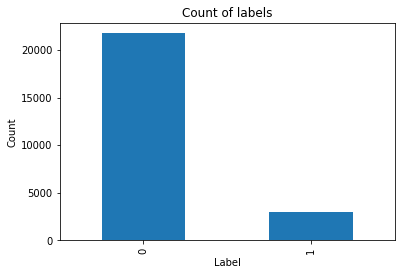

In [7]:
ax = df['lumpy'].value_counts().plot(kind='bar', title='Count of labels', xlabel='Label', ylabel='Count')

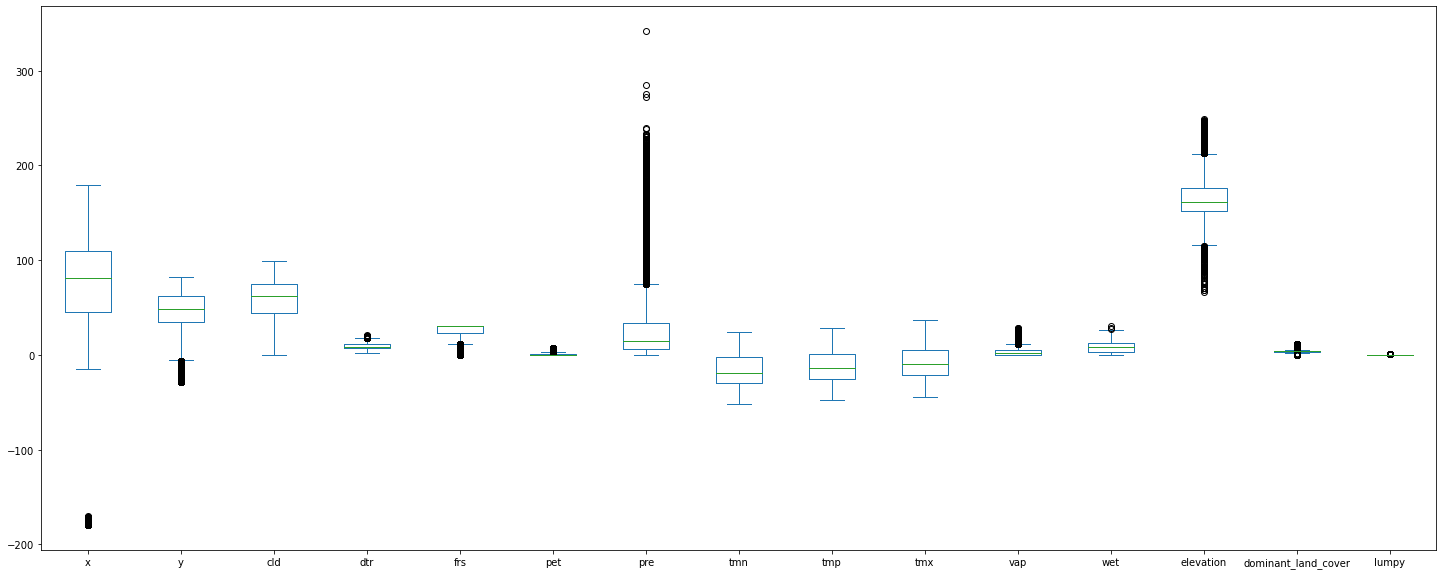

In [8]:
ax = df[df.columns.values].plot(kind='box', figsize=(25,10))

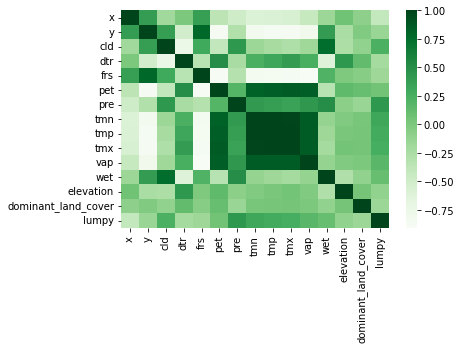

In [9]:
ax = sn.heatmap(df.corr(), cmap='Greens')

We can see that all the temperatures are highly correlated. The dark greenish box signifies their strong correlation.

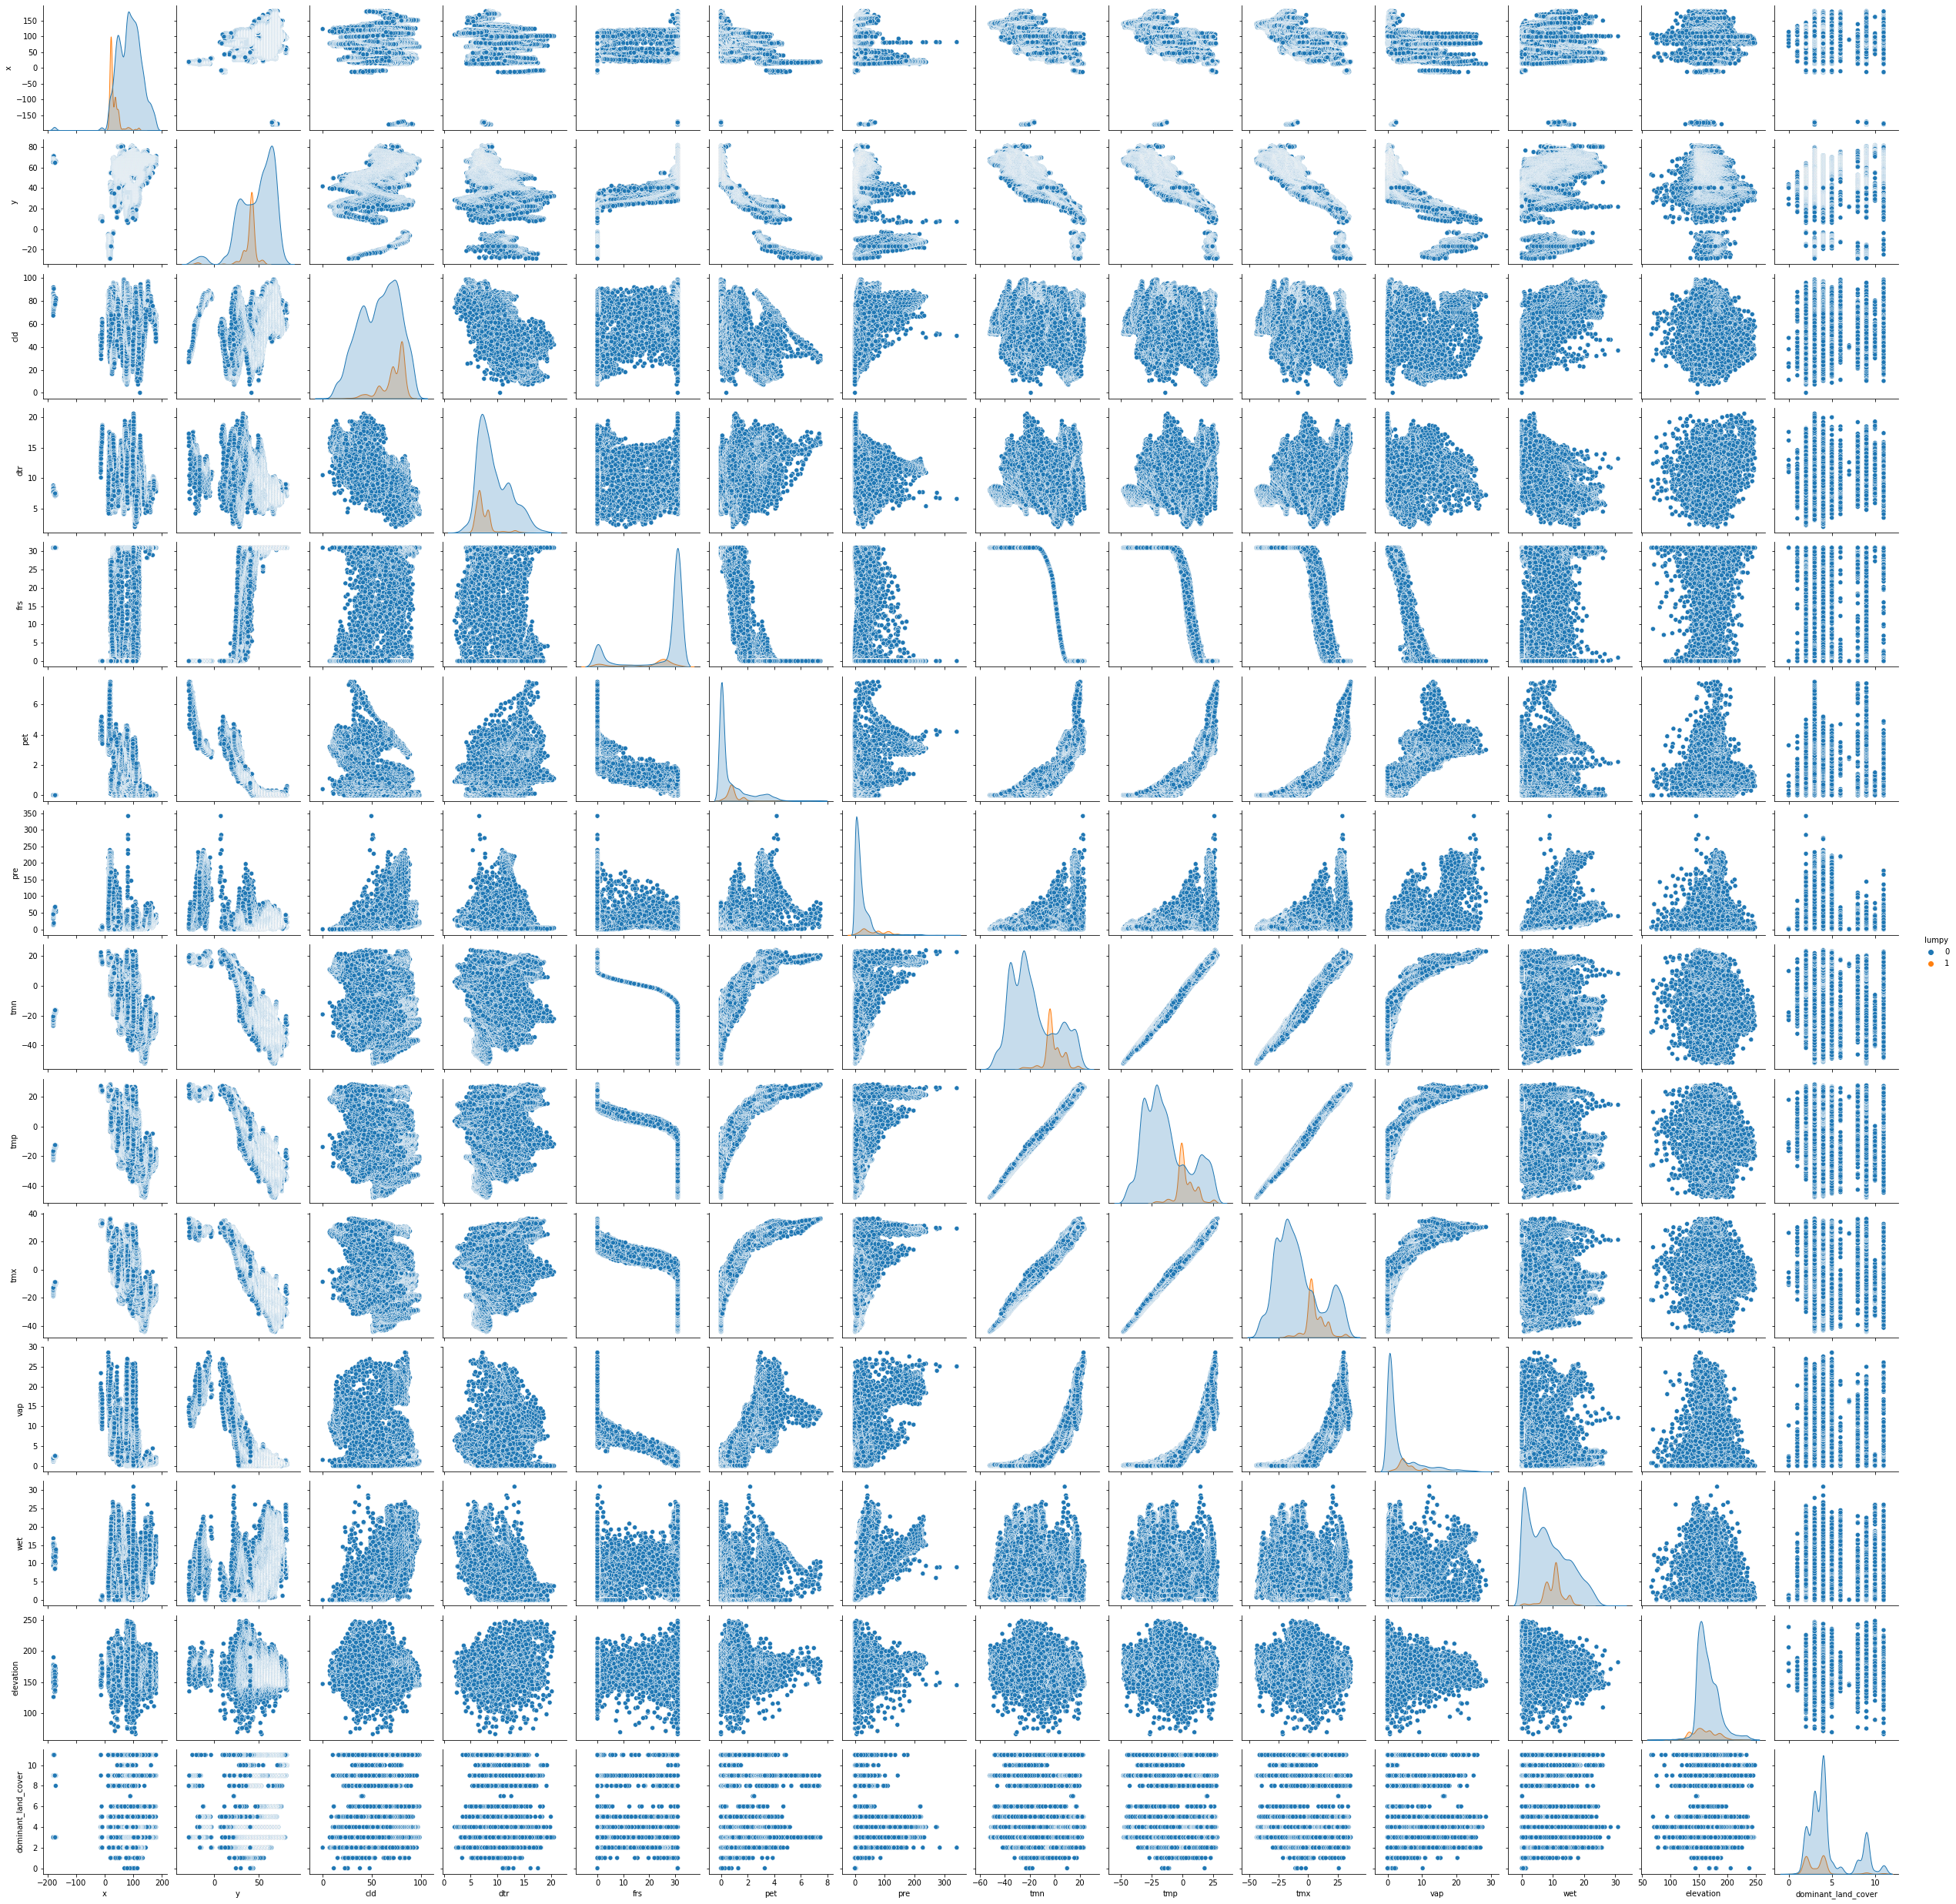

In [10]:
ax = sn.pairplot(df, hue='lumpy') # This takes around 3 mins to execute.

We can hardly see label 1 in this graph as it is an imbalanced dataset with only 14% of the labels belonging to having a lumpy skin disease. However, the visualization will change with under/over sampling. We will apply these techniques when we classify them. As of now, we just want to grasp basic insight of how the data is distributed. 

Lets try to find out what regions/countries have lumpy skin disease and in what distribution.

In [11]:
df = df_main

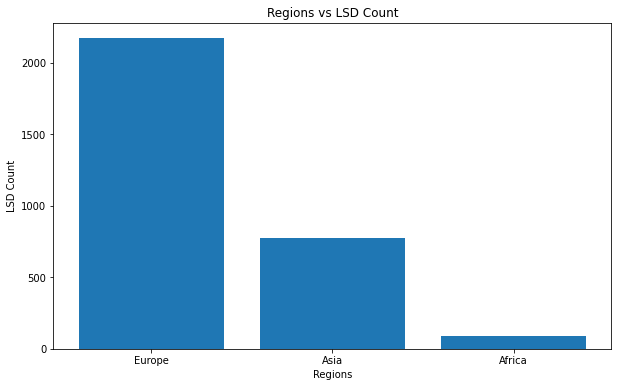

In [12]:
num_lsd_europe = df.loc[(df['region'] == 'Europe') & (df['lumpy'] == 1)].shape[0]
num_lsd_asia = df.loc[(df['region'] == 'Asia') & (df['lumpy'] == 1)].shape[0]
num_lsd_africa = df.loc[(df['region'] == 'Africa') & (df['lumpy'] == 1)].shape[0]

plt.figure(figsize=(10, 6))
plt.bar(x=['Europe', 'Asia', 'Africa'], height=[num_lsd_europe, num_lsd_asia, num_lsd_africa])
plt.title('Regions vs LSD Count')
plt.xlabel('Regions')
plt.ylabel('LSD Count')
plt.show()

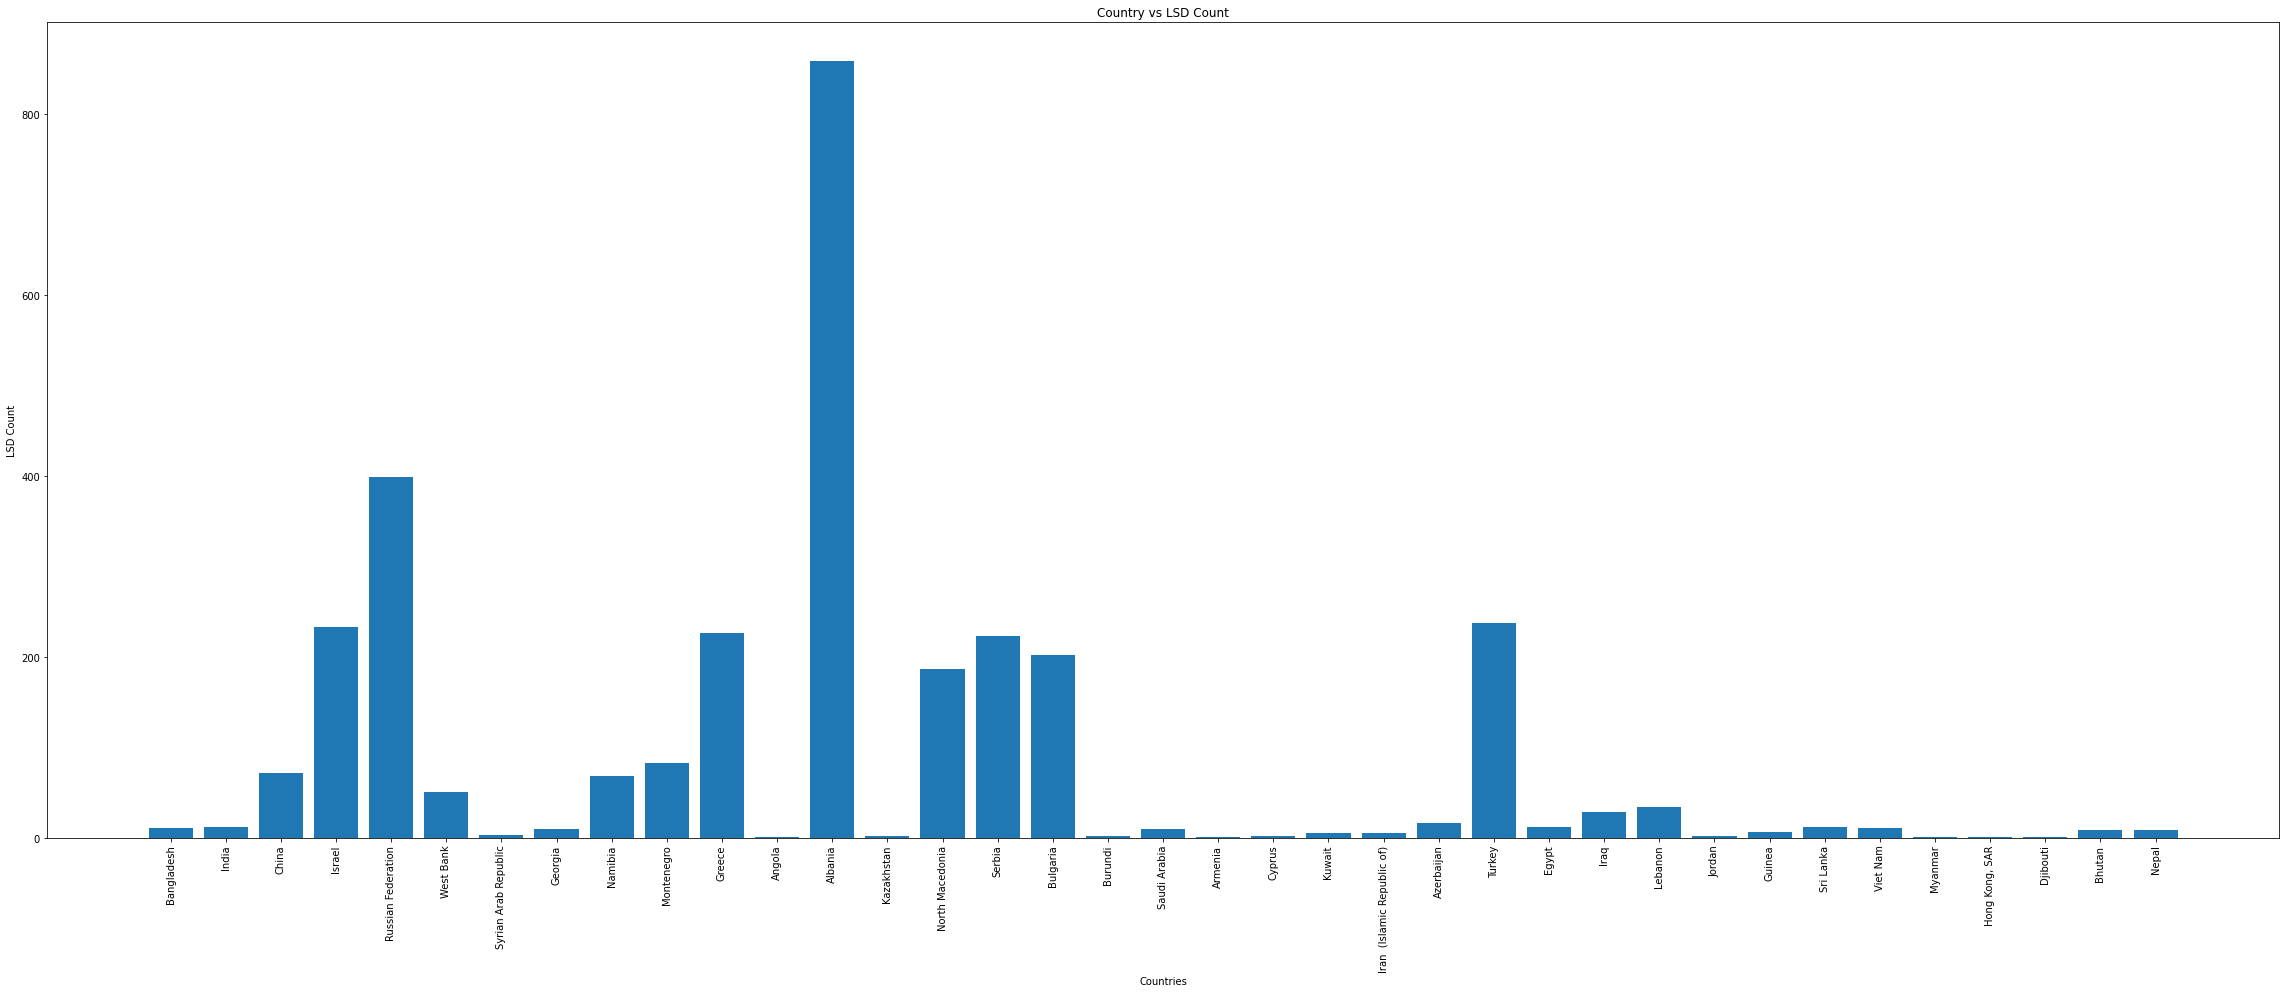

In [13]:
countries = df['country'].unique()
countries = countries[:-1] # There was a nan value even though it was not in the dataset. Hence, we remove it.

country_lsd_count_map = {}
for c in countries:
    lsd_count = df.loc[(df['country'] == c) & (df['lumpy'] == 1)].shape[0]
    country_lsd_count_map[c] = lsd_count

plt.figure(figsize=(40, 15))
plt.bar(x=country_lsd_count_map.keys(), height=country_lsd_count_map.values())
plt.title('Country vs LSD Count')
plt.xlabel('Countries')
plt.ylabel('LSD Count')
plt.xticks(rotation=90)
plt.show()

### Feature selection

In [7]:
X = df_main[['x', 'y', 'cld', 'dtr', 'frs', 'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet', 'elevation', 'dominant_land_cover']].values
y = df_main['lumpy'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(f'x_train shape = {x_train.shape} | y_train shape = {y_train.shape}')
print(f'x_test shape  = {x_test.shape}  | y_test shape = {y_test.shape}')

x_train shape = (19842, 14) | y_train shape = (19842,)
x_test shape  = (4961, 14)  | y_test shape = (4961,)


In [10]:
# This step is necessary as chi2 expects non-negative numbers. So, this step will convert each entry between 0 and 1.
x_train = MinMaxScaler().fit_transform(x_train) 

In [14]:
f_p_values = chi2(x_train, y_train)

# Creating a presentable view of the p-values.
p_values = pd.Series(f_p_values[1])
p_values.index = ['x', 'y', 'cld', 'dtr', 'frs', 'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet', 'elevation', 'dominant_land_cover']
p_values.sort_values(ascending=True)

pre                    7.595485e-100
tmn                     3.689878e-49
tmp                     1.004888e-42
tmx                     1.554400e-35
vap                     9.660117e-32
frs                     3.065312e-26
cld                     1.257365e-17
x                       1.787055e-16
dominant_land_cover     6.742103e-16
dtr                     3.006074e-15
wet                     3.920832e-08
y                       8.866778e-06
pet                     1.047557e-05
elevation               2.409416e-02
dtype: float64

From the p-values (smaller values are better), we can observe that features like 'pre', 'tmn', 'tmp', etc are more contributing towards the label 'lumpy'. In fact, 'dominant_land_cover' feature is also important. Since not a single feature is above 0.05 or 5% thresold value, we can choose all the above listed features as our final ones for classification.

Hence, the features that are selected are:
['x', 'y', 'cld', 'dtr', 'frs', 'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet', 'elevation', 'dominant_land_cover']